# Graphics in R

Let's make a recap about Marks, Channels and the GRammar of Graphics.

### Marks

**Marks are basic geometric elements that depict items**

Marks are geometric primitives classified according to the number of dimensions they require. 

Examples: points (0D), lines (1D), areas (2D) and volumes (3D).

▪ Volume marks are not commonly used.

*Tamara Muzner. Visualization Analysis and Design*

![marks](../img/marks.png)

## Channels

**A visual channel is a way to control the appearance of marks, independent of the dimensionality of the geometric primitives.**

*Tamara Muzner. Visualization Analysis and Design*

There are some commonly seen channel types:
- position
- color 
- shape 
- size

![channels](../img/channels.png)

## Grammar or Graphics

**"Applied to visualizations, a grammar of graphics is a grammar used to describe and create a wide range of statistical graphics."**

*Wilkinson, Leland. (2005). The Grammar of Graphics.*

The components of the Layered Grammar of Graphs are:
    
- Layer
    - Data
    - Mapping
    - Statistical transformation (stat)
    - **Geometric object (geom)**
    - **Position adjustment (position)**
- Scale
- Coordinate system (coord)
- Faceting (facet)


## Presenting GGplot2

ggplot2 is a system for declaratively creating graphics, based on The Grammar of Graphics. You provide the data, tell ggplot2 how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details.

It is part of the tidyverse

https://ggplot2.tidyverse.org/


Cheatsheet can be found here:
https://github.com/rstudio/cheatsheets/blob/main/data-visualization.pdf

The basic steps to build a graphic are:
 - Have data in a dataframe
 - Open the canvas
 - Map **channels** to variables in dataframe
 - Pick a primitive (**mark**)
 
Let's create a simple plot.

In [6]:
library(readr)
library(magrittr)
library(dplyr)
library(tidyr)
library(ggplot2)

NameError: name 'library' is not defined

In [5]:
df <- read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', show_col_types = FALSE)
head(df)

NameError: name 'df' is not defined

In [23]:
# here he have the dataframe
df %>%
  filter ( location == 'Mexico',
           date >= '2022-07-01')  %>%
  head()

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MEX,North America,Mexico,2022-07-01,6058689,24087,19371.86,325747,31,33.714,⋯,21.4,87.847,1.38,75.05,0.779,127504120,NA,NA,NA,NA
MEX,North America,Mexico,2022-07-02,6058689,0,14565.29,325747,0,24.429,⋯,21.4,87.847,1.38,75.05,0.779,127504120,NA,NA,NA,NA
MEX,North America,Mexico,2022-07-03,6089600,30911,18140.71,325788,41,29.714,⋯,21.4,87.847,1.38,75.05,0.779,127504120,654743.9,33.55,-4.13,5167.461
MEX,North America,Mexico,2022-07-04,6093835,4235,18268.14,325793,5,28.143,⋯,21.4,87.847,1.38,75.05,0.779,127504120,NA,NA,NA,NA
MEX,North America,Mexico,2022-07-05,6121808,27973,19270.14,325868,75,32.857,⋯,21.4,87.847,1.38,75.05,0.779,127504120,NA,NA,NA,NA
MEX,North America,Mexico,2022-07-06,6152924,31116,23715.29,325928,60,41.429,⋯,21.4,87.847,1.38,75.05,0.779,127504120,NA,NA,NA,NA


To map variables to the channels, we use the function `aes()`.
This can be used:
 - In the `ggplot` command (this inherits the aesthetics to the marks)
 - In the `geom_()` command (only apply the aesthetics to this mark)

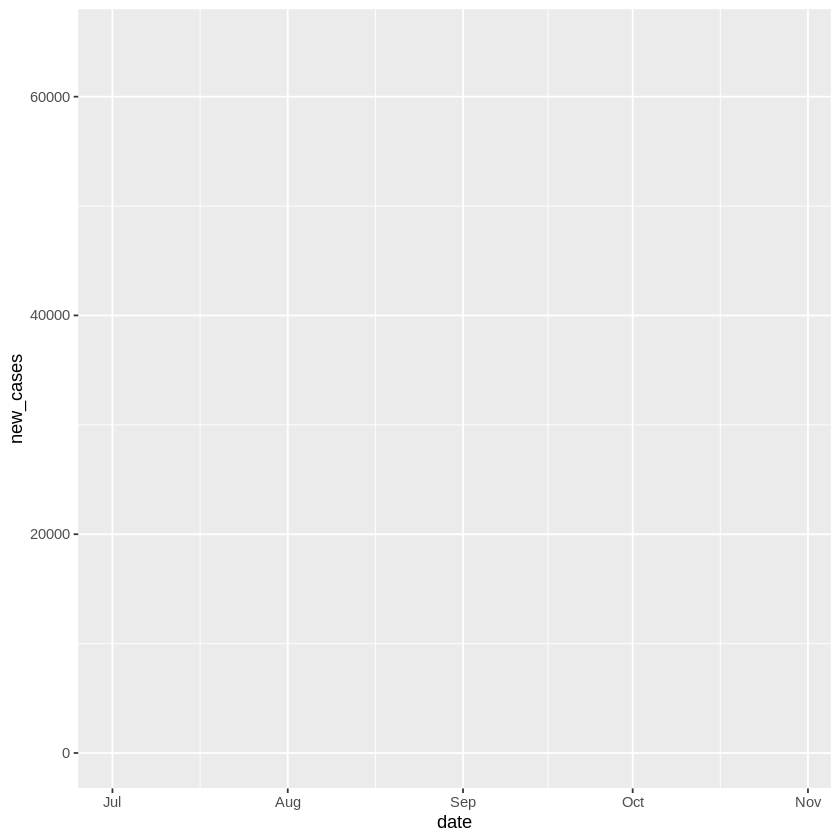

In [33]:
# assign channels in ggplot command
df %>%
  filter ( location == 'Mexico',
           date >= '2022-07-01')  %>%
  ggplot(aes(
      x = date,
      y = new_cases
  ))


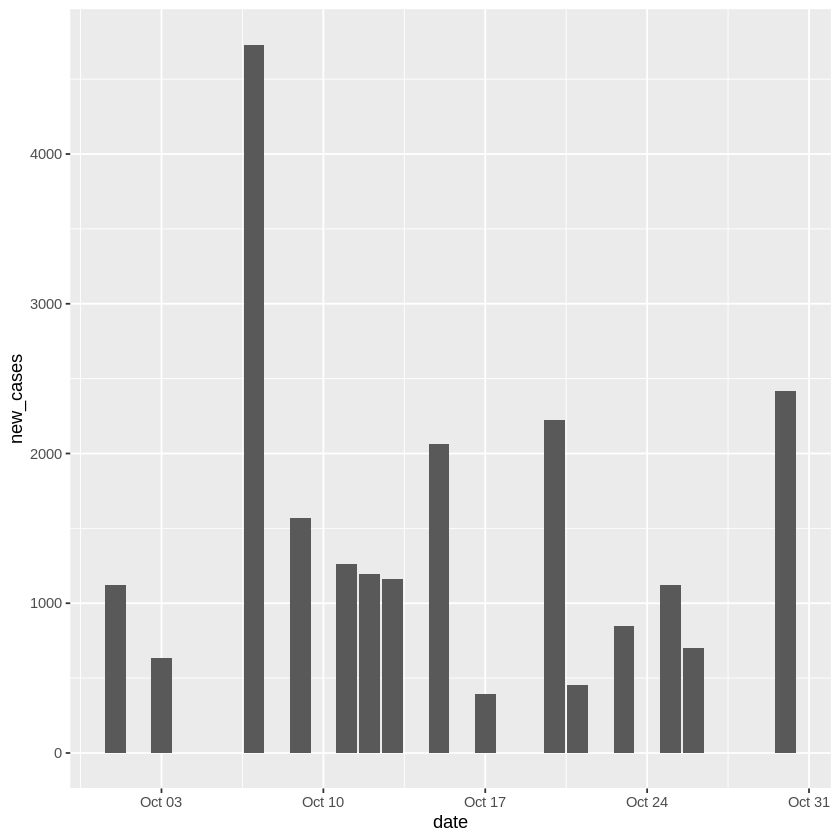

In [34]:
# assign channels in ggplot command
df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot(aes(
      x = date,
      y = new_cases
  )) +
  geom_bar(stat = "identity")

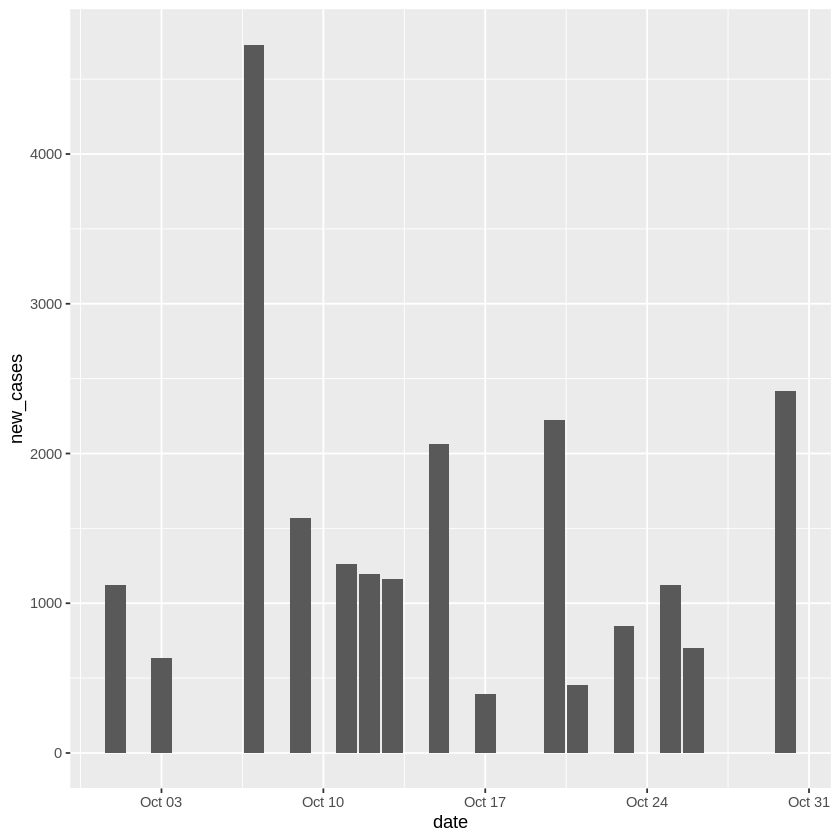

In [35]:
# assign channels in the geom command
df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_bar(aes(
      x = date,
      y = new_cases
  ),
  stat = "identity")

One of the beauties of ggplot is that is very easy to modify the labels, colors, legends, etc.

Even, there are basic templates we can use out of the box

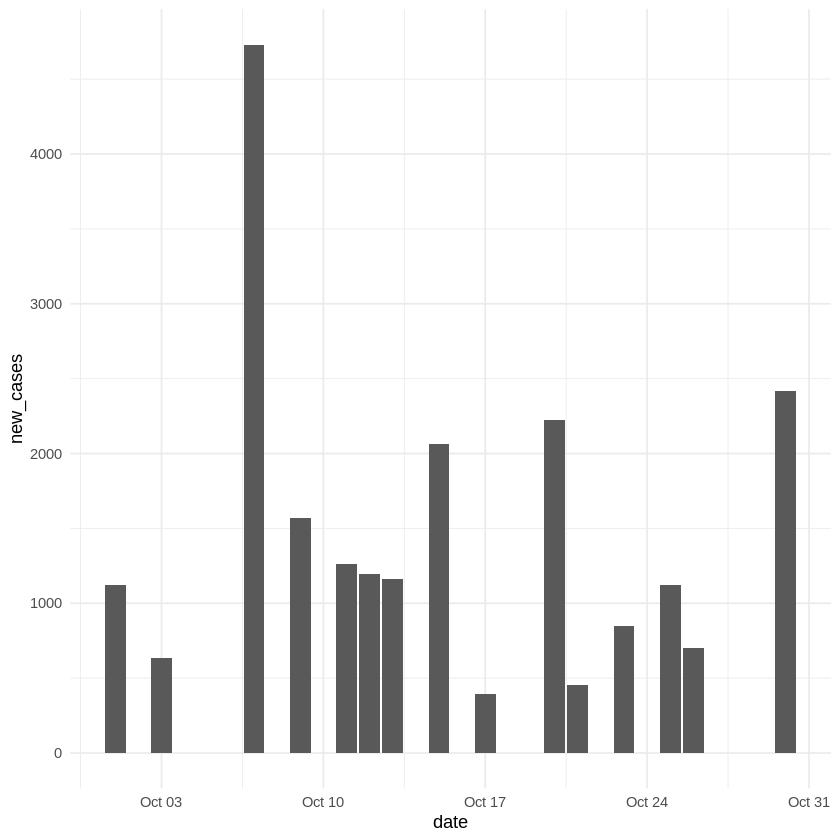

In [39]:

df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_bar(aes(
      x = date,
      y = new_cases
  ),
  stat = "identity") +
  theme_minimal()

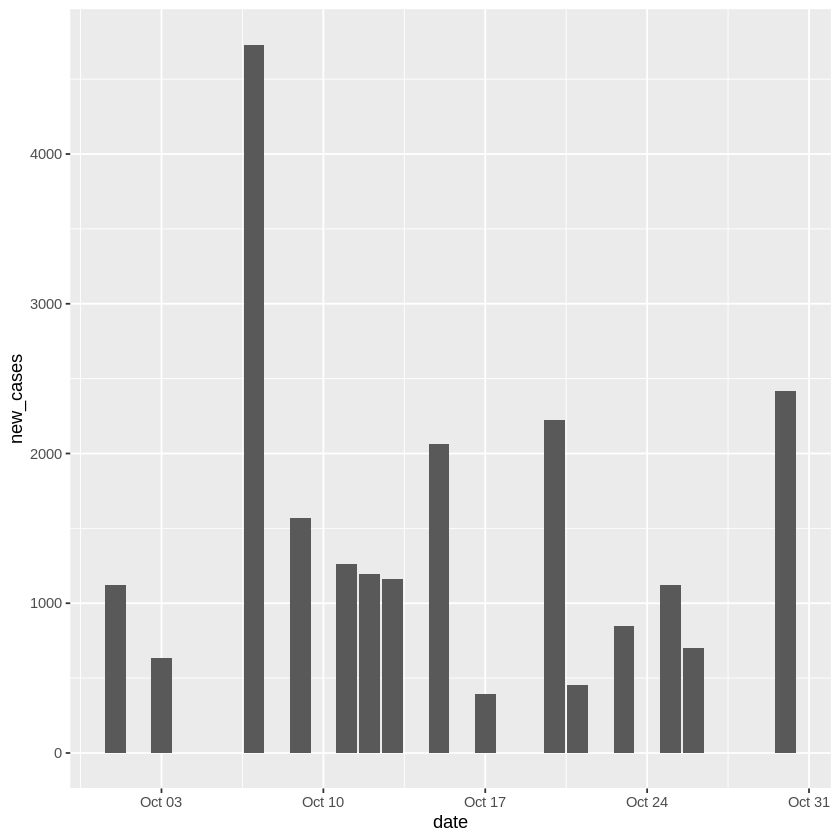

In [40]:

df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_bar(aes(
      x = date,
      y = new_cases
  ),
  stat = "identity") +
  theme_gray()

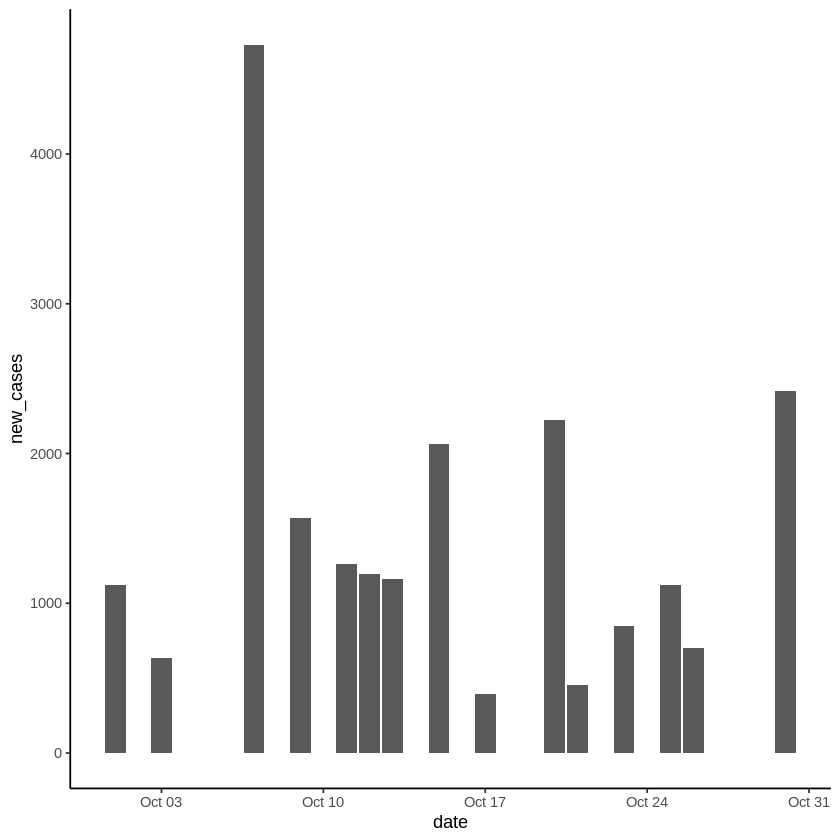

In [46]:

df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_bar(aes(
      x = date,
      y = new_cases
  ),
  stat = "identity") +
  theme_classic()

### Why the aes() is important

Let's assign a colors to the fill of each bar. First we will do outside the `aes()` and after, inside of.

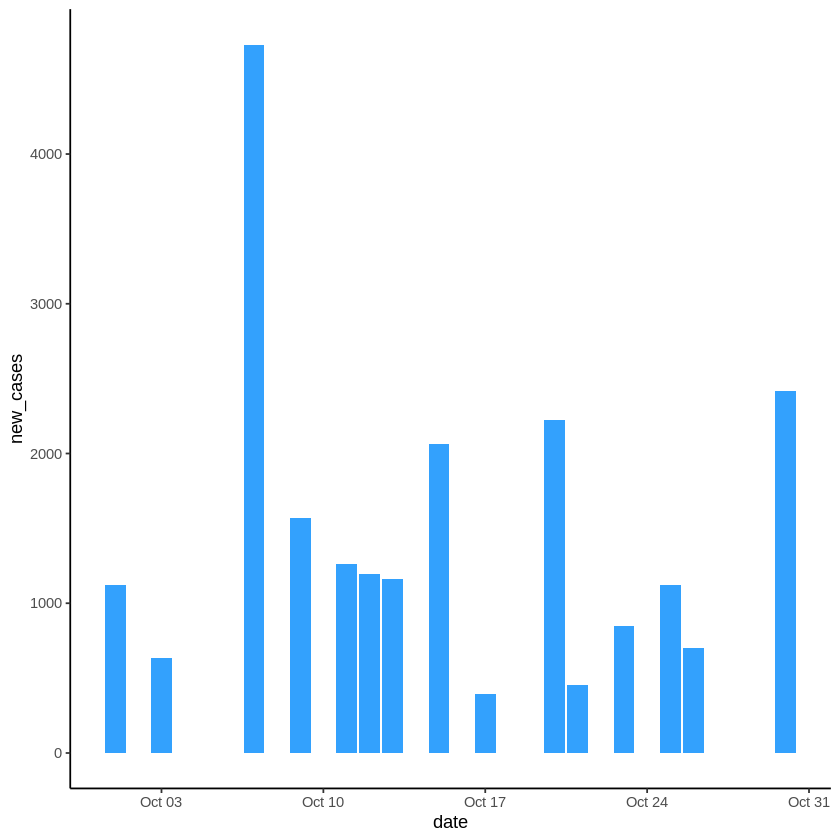

In [47]:

df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_bar(aes(
      x = date,
      y = new_cases
  ),
  fill = '#33A1FD',
  stat = "identity") +
  theme_classic()

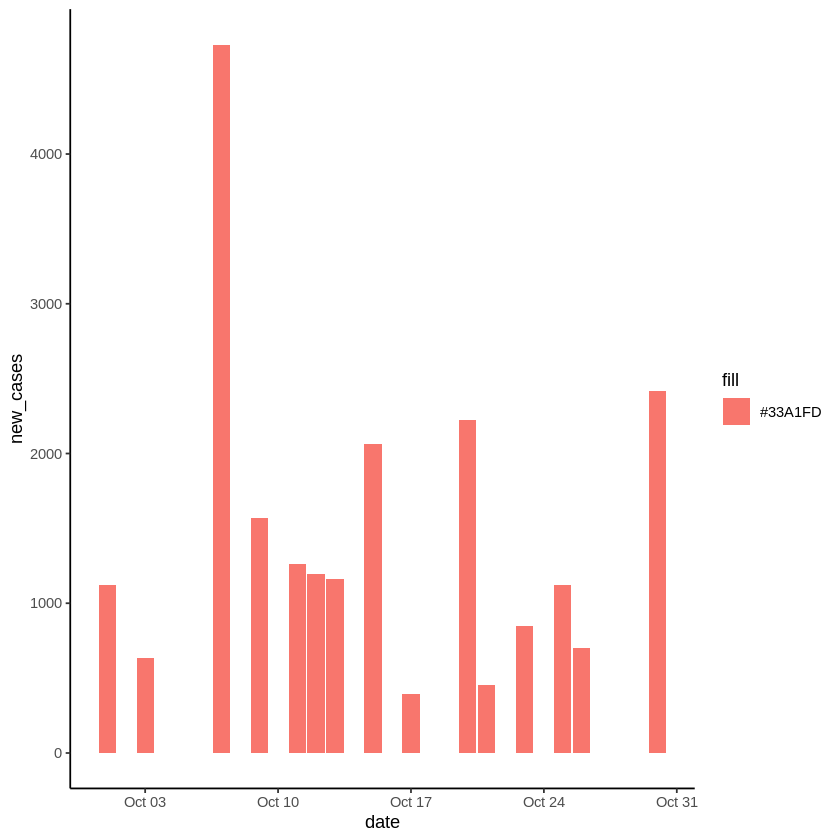

In [48]:

df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_bar(aes(
      x = date,
      y = new_cases,
      fill = '#33A1FD',
  ),
  stat = "identity") +
  theme_classic()

Why happened this?

Because if we assign the fill color inside the `aes()`, ggplot expects a variable. Tha means, that we use the `aes()` to encode variables, **not constants**.

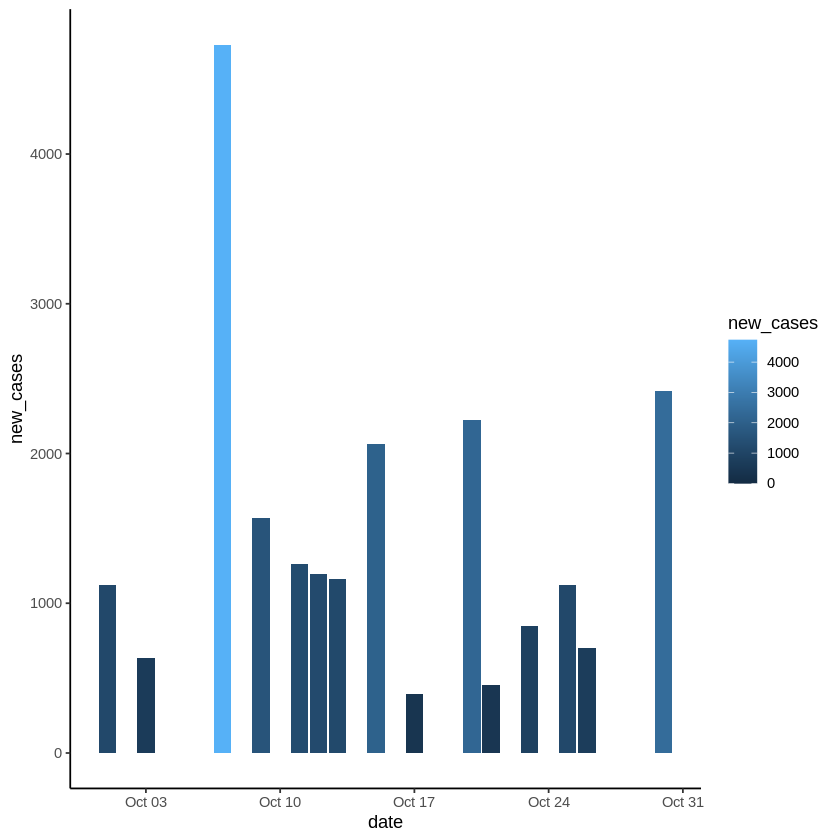

In [51]:
# assign fill to the number of new cases
df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_bar(aes(
      x = date,
      y = new_cases,
      fill = new_cases,
  ),
  stat = "identity") +
  theme_classic()

### Line Plot

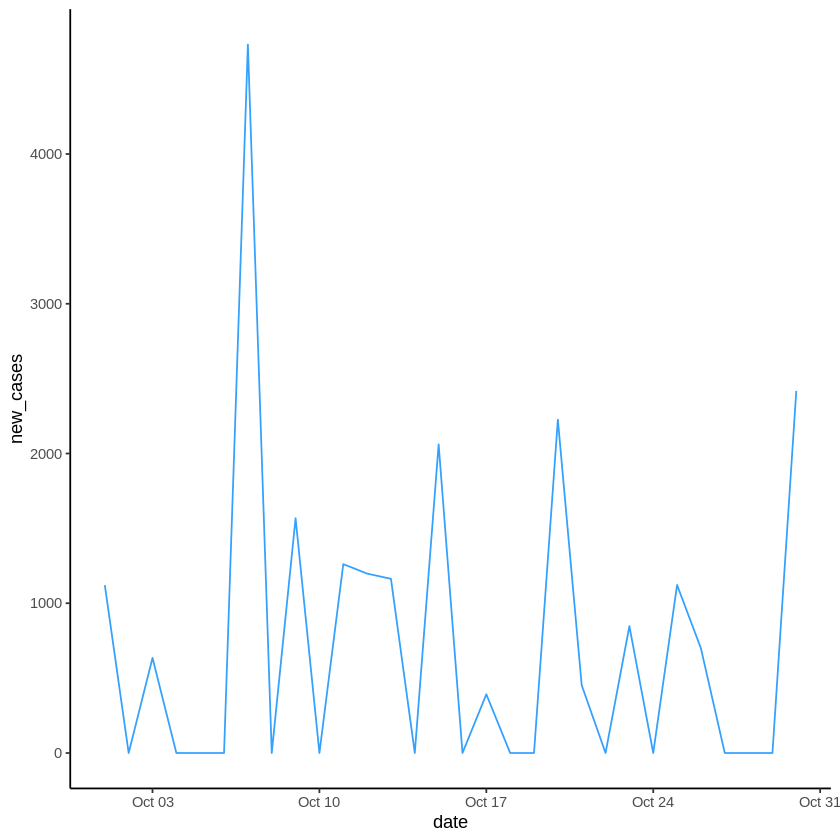

In [56]:
# assign fill to the number of new cases
df %>%
  filter ( location == 'Mexico',
           date >= '2022-10-01')  %>%
  ggplot() +
  geom_line(aes(
      x = date,
      y = new_cases
  ),
     color = '#33A1FD') +
  theme_classic()

### Scatterplot

For scatterplot leasia_data = data.query('continent == "Asia" and date == "2022-07-01"')t's create the same dataframe we used in Python notebook

In [59]:
asia_df <- df %>%
  filter ( continent == 'Asia',
           date == '2022-07-01')

head(asia_df)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Asia,Afghanistan,2022-07-01,182594,66,80.143,7723,0,0.857,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
ARM,Asia,Armenia,2022-07-01,423243,0,19.857,8629,0,0.000,⋯,52.1,94.043,4.2,75.09,0.776,2780472,NA,NA,NA,NA
AZE,Asia,Azerbaijan,2022-07-01,793302,126,28.000,9717,0,0.000,⋯,42.5,83.241,4.7,73.00,0.756,10358078,NA,NA,NA,NA
BHR,Asia,Bahrain,2022-07-01,627327,1471,1743.143,1493,1,0.143,⋯,37.6,NA,2.0,77.29,0.852,1472237,NA,NA,NA,NA
BGD,Asia,Bangladesh,2022-07-01,1975682,1893,1924.143,29154,5,2.714,⋯,44.7,34.808,0.8,72.59,0.632,171186368,NA,NA,NA,NA
BTN,Asia,Bhutan,2022-07-01,59729,0,7.857,21,0,0.000,⋯,NA,79.807,1.7,71.78,0.654,782457,NA,NA,NA,NA


Warning message:
“Removed 24 rows containing missing values (geom_point).”


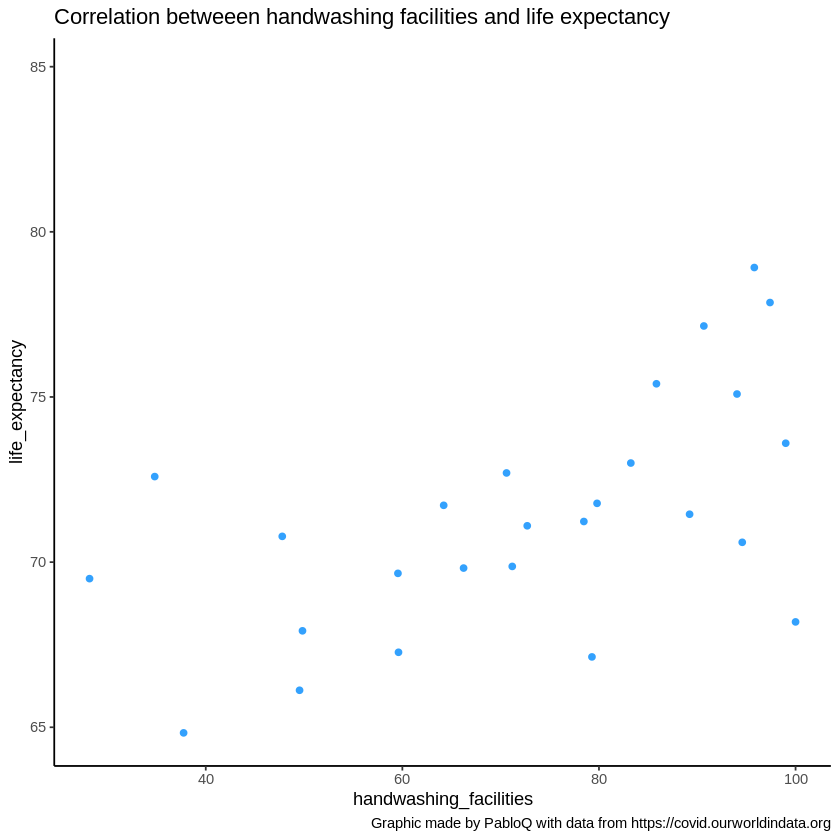

In [69]:
asia_df %>% 
  ggplot() +
  geom_point(aes(
      x = handwashing_facilities,
      y = life_expectancy
  ),
     color = '#33A1FD') +
  labs(title = "Correlation betweeen handwashing facilities and life expectancy",
       caption = "Graphic made by PabloQ with data from https://covid.ourworldindata.org") +
  theme_classic()

Warning message:
“Removed 24 rows containing missing values (geom_point).”


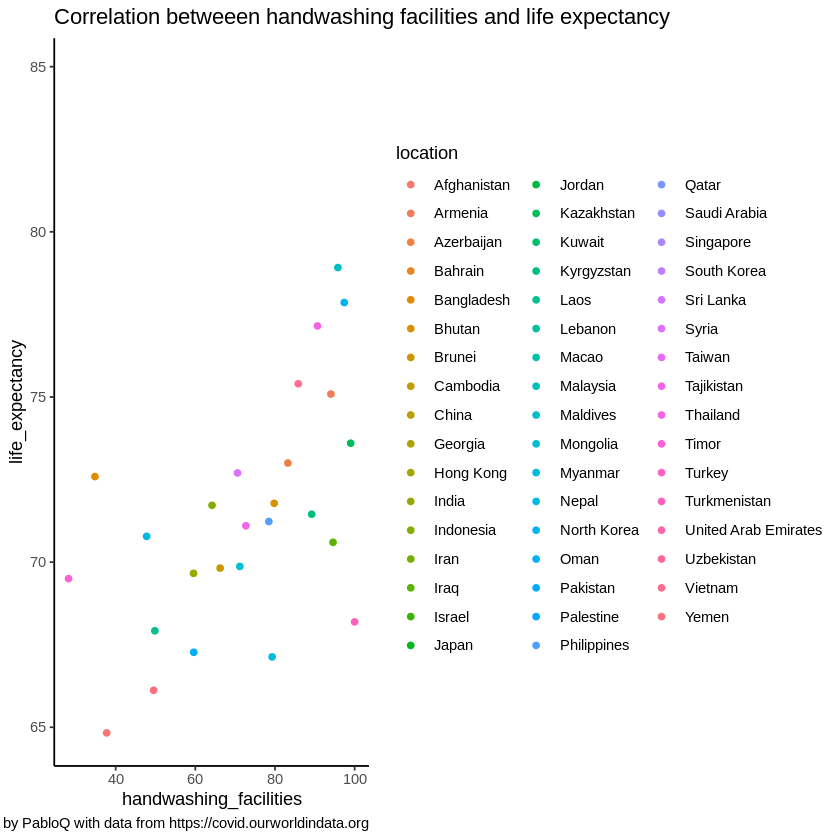

In [68]:
asia_df %>% 
  ggplot(aes(
      x = handwashing_facilities,
      y = life_expectancy,
      color = location
  )) +
  geom_point() +
  labs(title = "Correlation betweeen handwashing facilities and life expectancy",
       caption = "Graphic made by PabloQ with data from https://covid.ourworldindata.org") +
  theme_classic()

Warning message:
“Removed 24 rows containing missing values (geom_point).”
Warning message:
“Removed 24 rows containing missing values (geom_label).”


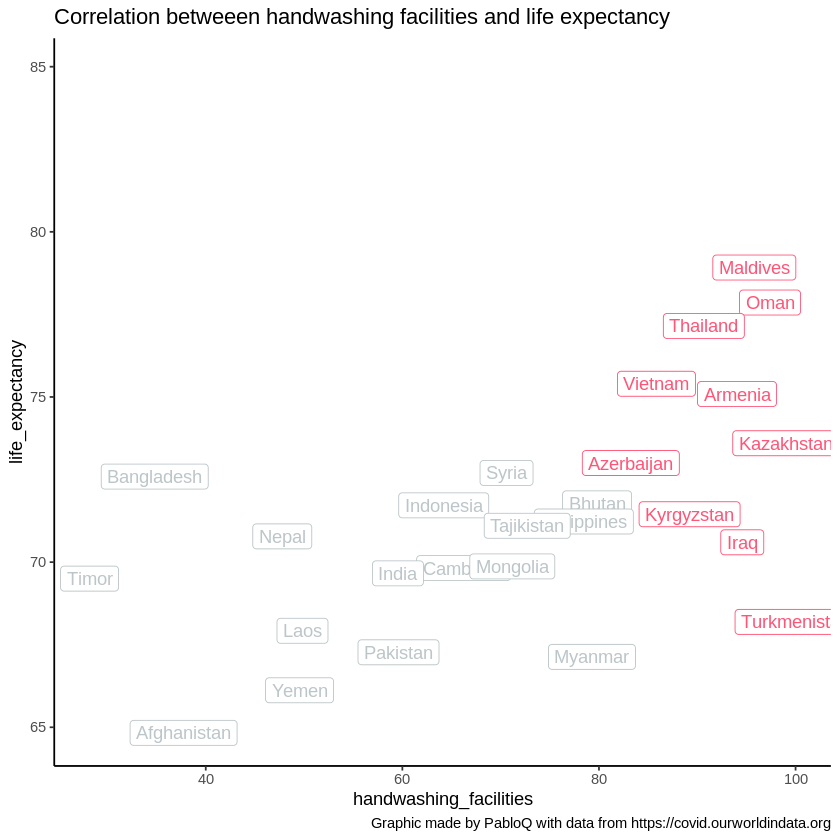

In [89]:
asia_df %>% 
  ggplot(aes(
      x = handwashing_facilities,
      y = life_expectancy,       
      color =  ifelse(handwashing_facilities > 80, "#FF5577", "#BCC5C8")
  )) +
  geom_point() +
  geom_label(aes(label = location)) +
  scale_color_identity() +
  labs(title = "Correlation betweeen handwashing facilities and life expectancy",
       caption = "Graphic made by PabloQ with data from https://covid.ourworldindata.org") +
  theme_classic()

In [2]:
asia_df %>% 
  ggplot(aes(
      x = handwashing_facilities,
      y = life_expectancy,       
      color =  ifelse(handwashing_facilities > 80, "#FF5577", "#BCC5C8")
  )) +
  geom_point() +
  geom_label(aes(label = location)) +
  scale_color_identity() +
  labs(title = "Correlation betweeen handwashing facilities and life expectancy",
       caption = "Graphic made by PabloQ with data from https://covid.ourworldindata.org") +
  facet_wrap(. ~ location ) +
  theme_classic()

SyntaxError: invalid syntax (3400265827.py, line 1)

### Heatmap

In [122]:
asia_df <- df %>%
  filter ( continent == 'Asia',
           date >= '2022-10-01',
           total_deaths > 30000)

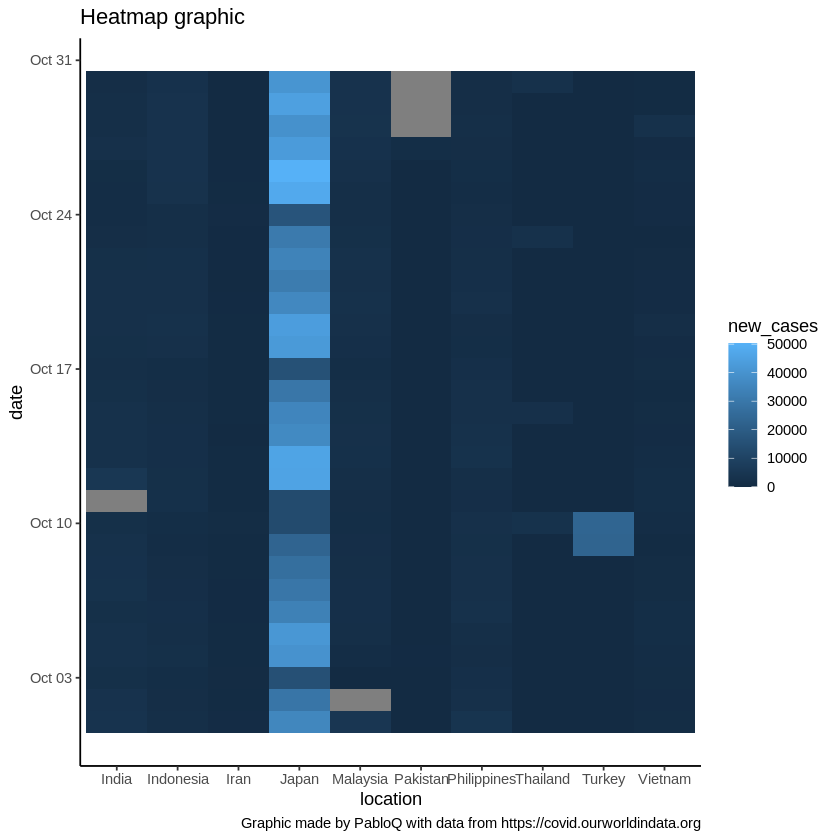

In [123]:
asia_df %>% 
  ggplot(aes(
      x = location,
      y = date,       
      fill = new_cases
  )) +
  geom_tile() +
  labs(title = "Heatmap graphic",
       caption = "Graphic made by PabloQ with data from https://covid.ourworldindata.org") +
  theme_classic()

### Themes

`ggpplot` is very customizable. You can modify any aspect of the graphic.

This a guide for every element you can alter

![marks](../img/ggplot_theme.jpeg)